In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
def linfun(x, m, q):
    return m*x+q

In [2]:
# La funzione chiq prende come parametri i valori teorici, le osservazioni, e gli errori sulle osservazioni
def chiq(exp, obs, obsErr):
    return sum(np.power((exp - obs), 2) / np.power(obsErr, 2))

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# La funzione testchiq prende come parametri i gradi di libertà, quantile inf, quantile sup e valore del chi quadro
def testchiq(degf, infq, supq, valchiq):
    infchiq = chi2.isf(
        q=1 - infq, df=degf)
    supchiq = chi2.isf(
        q=1 - supq, df=degf)
    print('Chi quadrato per modello e osservazioni: %f.' % valchiq)
    print(
        'Studiamo se il chi quadro è nel range [%f, %f]' % (infchiq, supchiq))
    if (valchiq <= supchiq) & (valchiq >= infchiq):
        print(color.BOLD + color.GREEN + 'Test del chi quadro superato!' +
              color.END + color.END)
    else:
        print(color.BOLD + color.RED + 'Test del chi quadro non superato!' +
              color.END + color.END)

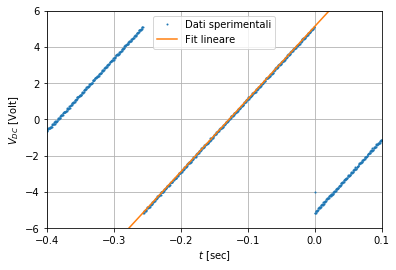

40.10540389880025

5.115590360236599

array([0.02004169, 0.00296955])

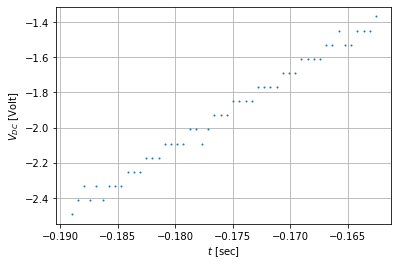

In [35]:
%matplotlib inline
#for i in range(0,5):
#    df = pd.read_csv(f'data/dac{i}.csv', skiprows=[0]).dropna()
#    plt.figure()
#    plt.plot(df['Volt'][526:999], markersize=2, marker='.', linestyle=' ')
dfdac = pd.read_csv(f'data/dac0.csv', skiprows=[0]).dropna()

popt1, pcov1 = curve_fit(linfun, dfdac['second'][526:999], dfdac['Volt'][526:999])
dac1 = plt.figure()
plt.grid()
plt.plot(dfdac['second'], dfdac['Volt'], markersize=2, marker='.', linestyle=' ', label='Dati sperimentali')
plt.plot(dfdac['second'][400:1200], linfun(dfdac['second'][400:1200], *popt1), label='Fit lineare')
plt.legend(loc='best')
plt.xlabel('$t$ [sec]')
plt.ylabel('$V_{DC}$ [Volt]')
plt.xlim((-0.4,0.1))
plt.ylim((-6,+6))
plt.show()
display(*popt1, np.sqrt(np.diag(pcov1)))

dac2 = plt.figure()
plt.grid()
plt.errorbar(dfdac['second'][650:700], dfdac['Volt'][650:700], markersize=2, marker='.', linestyle=' ')
plt.xlabel('$t$ [sec]')
plt.ylabel('$V_{DC}$ [Volt]')
plt.show()

\begin{tabular}{rl}
\toprule
 \$V\_x\$ [Volt] & Hex \\
\midrule
        -2.50 &  43 \\
        -2.25 &  49 \\
        -2.00 &  51 \\
        -1.75 &  57 \\
        -1.50 &  5C \\
        -1.25 &  62 \\
        -1.00 &  6C \\
        -0.75 &  70 \\
        -0.50 &  75 \\
        -0.25 &  7D \\
         0.00 &  85 \\
         0.25 &  89 \\
         0.50 &  8E \\
         0.75 &  95 \\
         1.00 &  93 \\
         1.25 &  A2 \\
         1.50 &  A8 \\
         1.75 &  AE \\
         2.00 &  B7 \\
         2.25 &  BA \\
         2.50 &  C0 \\
\bottomrule
\end{tabular}



[67,
 73,
 81,
 87,
 92,
 98,
 108,
 112,
 117,
 125,
 133,
 137,
 142,
 149,
 147,
 162,
 168,
 174,
 183,
 186,
 192]

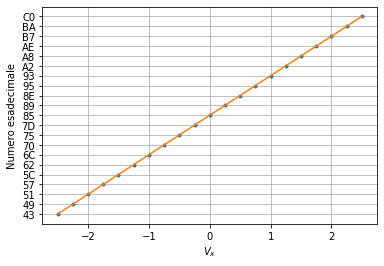

In [34]:
%matplotlib inline
hexarr = ['43', '49', '51', '57', '5C', '62', '6C', '70', '75', '7D', '85', '89', '8E', '95', '93', 'A2', 'A8', 'AE', 'B7', 'BA', 'C0']
voltarr = [-2.5, -2.25, -2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.50, 0.75, 1, 1.25, 1.50, 1.75, 2, 2.25, 2.5]
hexdict = {
    '$V_x$ [Volt]': voltarr,
    'Hex': hexarr
}
dfhex = pd.DataFrame(hexdict)
print(dfhex.to_latex(index=False))

def hextoint(x):
    return int(x, 16)
hexintarr = [hextoint(item) for item in hexarr]

display(hexintarr)

adc1 = plt.figure()
plt.grid()
plt.plot(voltarr, hexarr, '.')
plt.plot(voltarr, hexarr, '-')
plt.xlabel('$V_x$')
plt.ylabel('Numero esadecimale')
plt.show()

In [36]:
dac1.savefig('dac1.pdf', bbox_inches='tight')
dac2.savefig('dac2.pdf', bbox_inches='tight')
adc1.savefig('adc1.pdf', bbox_inches='tight')